# Baseline for Ubiquant Market Prediction using ANN

**Thanks to notebook contributors for make baseline for my notebook**
- https://www.kaggle.com/code/sohier/competition-api-detailed-introduction/notebook
- https://www.kaggle.com/code/pythonash/end-to-end-simple-and-powerful-dnn-with-leakyrelu
- https://www.kaggle.com/code/robikscube/fast-data-loading-and-low-mem-with-parquet-files

First import libraries and dataset.

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow.keras as keras
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
df = pd.read_parquet('D:/kaggle_datasets/ubiquant-parquet/train_low_mem.parquet')
df = df.astype("float16")

In [5]:
tf.__version__

'2.7.0'

# Preprocess dataset

Because of it's baseline I use only f_n for features for X_train.

In [6]:
index_col = df.drop(["row_id", "time_id", "investment_id", "target"], axis=1).columns
X_train = df[index_col]

In [7]:
y_train = df["target"]

# Making model

I make simple model using Dense layer and BatchNormalizaion without hyper parameter tuning.

In [8]:
df["time_id"][df["time_id"]==900.0]

2122479    900.0
2122480    900.0
2122481    900.0
2122482    900.0
2122483    900.0
           ...  
2125507    900.0
2125508    900.0
2125509    900.0
2125510    900.0
2125511    900.0
Name: time_id, Length: 3033, dtype: float16

In [9]:
X_train, y_train, X_test, y_test = X_train[0:2122479], y_train[0:2122479], X_train[2122479:], y_train[2122479:]

In [8]:
def pearson_correlation(y_true, y_pred, axis=-1):
    y_true = y_true-tf.reduce_mean(y_true)
    y_pred = y_pred-tf.reduce_mean(y_pred)
    y_true = tf.linalg.l2_normalize(y_true, axis=axis)
    y_pred = tf.linalg.l2_normalize(y_pred, axis=axis)
    return tf.reduce_sum(y_true * y_pred, axis=axis)

def pearson_correlation_loss(y_true, y_pred, axis=-1):
    y_true = y_true-tf.reduce_mean(y_true)
    y_pred = y_pred-tf.reduce_mean(y_pred)
    cosine = keras.losses.cosine_similarity(y_true, y_pred, axis=axis)
    return cosine

In [10]:
es = keras.callbacks.EarlyStopping(monitor="val_mse", patience=4, mode="min")

In [11]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(128, activation="relu", kernel_initializer=keras.initializers.he_normal)(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear", kernel_initializer=keras.initializers.he_normal)(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [12]:
history=[]
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
history.append(model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[es]))
del model

Epoch 1/15
66328/66328 [==============================] - 653s 10ms/step - loss: 0.8357 - mse: 0.8357 - mae: 0.6334 - val_loss: 0.8317 - val_mse: 0.8317 - val_mae: 0.6098
Epoch 2/15
66328/66328 [==============================] - 691s 10ms/step - loss: 0.8289 - mse: 0.8289 - mae: 0.6305 - val_loss: 0.8324 - val_mse: 0.8324 - val_mae: 0.6108
Epoch 3/15
66328/66328 [==============================] - 687s 10ms/step - loss: 0.8259 - mse: 0.8259 - mae: 0.6294 - val_loss: 0.8309 - val_mse: 0.8309 - val_mae: 0.6103
Epoch 4/15
66328/66328 [==============================] - 693s 10ms/step - loss: 0.8235 - mse: 0.8235 - mae: 0.6285 - val_loss: 0.8321 - val_mse: 0.8321 - val_mae: 0.6116
Epoch 5/15
66328/66328 [==============================] - 626s 9ms/step - loss: 0.8214 - mse: 0.8214 - mae: 0.6277 - val_loss: 0.8334 - val_mse: 0.8334 - val_mae: 0.6143
Epoch 6/15
66328/66328 [==============================] - 660s 10ms/step - loss: 0.8194 - mse: 0.8194 - mae: 0.6271 - val_loss: 0.8311 - val_mse: 

In [13]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(256, activation="relu", kernel_initializer=keras.initializers.he_normal)(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="relu", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear", kernel_initializer=keras.initializers.he_normal)(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [14]:
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
history.append(model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[es]))
del model

Epoch 1/15
66328/66328 [==============================] - 743s 11ms/step - loss: 0.8383 - mse: 0.8383 - mae: 0.6346 - val_loss: 0.8281 - val_mse: 0.8281 - val_mae: 0.6087
Epoch 2/15
66328/66328 [==============================] - 749s 11ms/step - loss: 0.8305 - mse: 0.8305 - mae: 0.6312 - val_loss: 0.8328 - val_mse: 0.8328 - val_mae: 0.6120
Epoch 3/15
66328/66328 [==============================] - 748s 11ms/step - loss: 0.8276 - mse: 0.8276 - mae: 0.6300 - val_loss: 0.8296 - val_mse: 0.8296 - val_mae: 0.6130
Epoch 4/15
66328/66328 [==============================] - 749s 11ms/step - loss: 0.8250 - mse: 0.8250 - mae: 0.6291 - val_loss: 0.8306 - val_mse: 0.8306 - val_mae: 0.6110
Epoch 5/15
66328/66328 [==============================] - 749s 11ms/step - loss: 0.8225 - mse: 0.8225 - mae: 0.6282 - val_loss: 0.8348 - val_mse: 0.8348 - val_mae: 0.6137


In [15]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(128, activation="swish", kernel_initializer=keras.initializers.he_normal)(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="swish", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="swish", kernel_initializer=keras.initializers.he_normal)(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear", kernel_initializer=keras.initializers.he_normal)(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [16]:
model.compile(loss="mse", optimizer="adam", metrics=["mse", "mae"])
history.append(model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, callbacks=[es]))

Epoch 1/15
66328/66328 [==============================] - 655s 10ms/step - loss: 0.8349 - mse: 0.8349 - mae: 0.6330 - val_loss: 0.8288 - val_mse: 0.8288 - val_mae: 0.6102
Epoch 2/15
66328/66328 [==============================] - 660s 10ms/step - loss: 0.8286 - mse: 0.8286 - mae: 0.6303 - val_loss: 0.8333 - val_mse: 0.8333 - val_mae: 0.6134
Epoch 3/15
66328/66328 [==============================] - 665s 10ms/step - loss: 0.8260 - mse: 0.8260 - mae: 0.6293 - val_loss: 0.8329 - val_mse: 0.8329 - val_mae: 0.6121
Epoch 4/15
66328/66328 [==============================] - 692s 10ms/step - loss: 0.8236 - mse: 0.8236 - mae: 0.6285 - val_loss: 0.8341 - val_mse: 0.8341 - val_mae: 0.6151
Epoch 5/15
66328/66328 [==============================] - 702s 11ms/step - loss: 0.8214 - mse: 0.8214 - mae: 0.6276 - val_loss: 0.8350 - val_mse: 0.8350 - val_mae: 0.6127


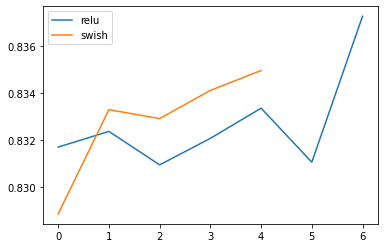

In [29]:
plt.plot(history[0].history["val_mse"], label="relu")
plt.plot(history[2].history["val_mse"], label="swish")
plt.legend()
plt.show()

In [13]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(128)(Input)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64)(x)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32)(x)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16)(x)
x = keras.layers.LeakyReLU(alpha=0.2, )(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear")(x)

model_leak = keras.models.Model(inputs = Input, outputs = Output)

In [14]:
model_leak.compile(loss=pearson_correlation_loss, optimizer="adam", metrics=["mse", pearson_correlation])
history = model_leak.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
53062/53062 [==============================] - 535s 10ms/step - loss: -0.0168 - mse: 5.1480 - pearson_correlation: 0.0168 - val_loss: -0.0261 - val_mse: 5.6028 - val_pearson_correlation: 0.0261
Epoch 2/5
53062/53062 [==============================] - 537s 10ms/step - loss: -0.0410 - mse: 9.0370 - pearson_correlation: 0.0410 - val_loss: -0.0213 - val_mse: 12.6602 - val_pearson_correlation: 0.0213
Epoch 3/5
53062/53062 [==============================] - 547s 10ms/step - loss: -0.0387 - mse: 12.3854 - pearson_correlation: 0.0387 - val_loss: -0.0224 - val_mse: 12.7966 - val_pearson_correlation: 0.0224
Epoch 4/5
53062/53062 [==============================] - 515s 10ms/step - loss: -0.0497 - mse: 15.0104 - pearson_correlation: 0.0497 - val_loss: -0.0341 - val_mse: 18.8002 - val_pearson_correlation: 0.0341
Epoch 5/5
53062/53062 [==============================] - 511s 10ms/step - loss: -0.0675 - mse: 20.9339 - pearson_correlation: 0.0675 - val_loss: -0.0520 - val_mse: 47.9651 - val_p

# 특성 공학 및 하이퍼 파라미터 서칭 

In [99]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(128)(Input)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64)(x)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32)(x)
x = keras.layers.LeakyReLU(alpha=0.2)(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16)(x)
x = keras.layers.LeakyReLU(alpha=0.2, )(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear")(x)

model_leak = keras.models.Model(inputs = Input, outputs = Output)

In [24]:
model_leak.compile(loss="mse", optimizer="adam", metrics=["mse"])
history = model_leak.fit(X_train, y_train, validation_split=0.2, epochs=5)

Train on 2513128 samples, validate on 628282 samples
Epoch 1/5
2513128/2513128 [==============================] - 469s 187us/sample - loss: 0.8408 - mse: 0.8408 - val_loss: 0.8120 - val_mse: 0.8120
Epoch 2/5
2513128/2513128 [==============================] - 421s 167us/sample - loss: 0.8347 - mse: 0.8347 - val_loss: 0.8096 - val_mse: 0.8096
Epoch 3/5
2513128/2513128 [==============================] - 427s 170us/sample - loss: 0.8323 - mse: 0.8323 - val_loss: 0.8087 - val_mse: 0.8087
Epoch 4/5
2513128/2513128 [==============================] - 347s 138us/sample - loss: 0.8308 - mse: 0.8308 - val_loss: 0.8127 - val_mse: 0.8127
Epoch 5/5
2513128/2513128 [==============================] - 347s 138us/sample - loss: 0.8296 - mse: 0.8296 - val_loss: 0.8107 - val_mse: 0.8107


In [31]:
index_col = df.drop(["row_id", "target", "time_id"], axis=1).columns
X_train = df[index_col]
X_train = X_train.astype("float16")
y_train = df["target"]

In [32]:
X_train

,investment_id,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,1.0,0.932617,0.113708,-0.402100,0.378418,-0.203979,-0.413574,0.965820,1.230469,0.114807,...,0.365967,-1.095703,0.200073,0.819336,0.941406,-0.086792,-1.086914,-1.044922,-0.287598,0.321533
1,2.0,0.811035,-0.514160,0.742188,-0.616699,-0.194214,1.771484,1.427734,1.133789,0.114807,...,-0.154175,0.912598,-0.734375,0.819336,0.941406,-0.387695,-1.086914,-0.929688,-0.974121,-0.343506
2,6.0,0.394043,0.615723,0.567871,-0.607910,0.068909,-1.083008,0.979492,-1.125977,0.114807,...,-0.138062,0.912598,-0.551758,-1.220703,-1.060547,-0.219116,-1.086914,-0.612305,-0.113953,0.243652
3,7.0,-2.343750,-0.011871,1.875000,-0.606445,-0.586914,-0.815918,0.778320,0.299072,0.114807,...,0.382080,0.912598,-0.266357,-1.220703,0.941406,-0.608887,0.104919,-0.783203,1.151367,-0.773438
4,8.0,0.842285,-0.262939,2.330078,-0.583496,-0.618164,-0.742676,-0.946777,1.230469,0.114807,...,-0.170410,0.912598,-0.741211,-1.220703,0.941406,-0.588379,0.104919,0.753418,1.345703,-0.737793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141405,3768.0,0.093506,-0.720215,-0.345459,-0.438721,-0.166992,-0.437256,1.475586,1.284180,0.056427,...,-0.285889,-1.232422,-0.660645,0.875488,0.421631,-0.427979,-0.075562,-0.533203,-0.193726,-0.581543
3141406,3768.0,-1.344727,-0.199951,-0.107727,-0.454590,-0.221924,-0.141113,-1.498047,1.374023,0.056427,...,0.184570,-1.232422,-0.670410,0.875488,0.421631,-0.729980,-1.514648,0.013145,-0.890137,-0.589844
3141407,3770.0,0.979492,-1.110352,1.006836,-0.467285,-0.159546,1.355469,0.150757,-0.088928,0.056427,...,-0.756348,-1.232422,0.820801,-1.142578,0.421631,-0.363281,1.363281,-0.079102,-1.580078,-0.297607
3141408,3772.0,-2.564453,0.320312,0.076599,1.379883,-0.155396,-0.688965,0.381104,-1.325195,0.056427,...,-0.756348,-1.232422,0.133057,-1.142578,0.421631,-0.375244,-1.514648,-0.973633,0.608887,-0.372070


In [33]:
df

,row_id,time_id,investment_id,target,f_0,f_1,f_2,f_3,f_4,f_5,...,f_290,f_291,f_292,f_293,f_294,f_295,f_296,f_297,f_298,f_299
0,0_1,0,1,-0.300875,0.932573,0.113691,-0.402206,0.378386,-0.203938,-0.413469,...,0.366028,-1.095620,0.200075,0.819155,0.941183,-0.086764,-1.087009,-1.044826,-0.287605,0.321566
1,0_2,0,2,-0.231040,0.810802,-0.514115,0.742368,-0.616673,-0.194255,1.771210,...,-0.154193,0.912726,-0.734579,0.819155,0.941183,-0.387617,-1.087009,-0.929529,-0.974060,-0.343624
2,0_6,0,6,0.568807,0.393974,0.615937,0.567806,-0.607963,0.068883,-1.083155,...,-0.138020,0.912726,-0.551904,-1.220772,-1.060166,-0.219097,-1.087009,-0.612428,-0.113944,0.243608
3,0_7,0,7,-1.064780,-2.343535,-0.011870,1.874606,-0.606346,-0.586827,-0.815737,...,0.382201,0.912726,-0.266359,-1.220772,0.941183,-0.609113,0.104928,-0.783423,1.151730,-0.773309
4,0_8,0,8,-0.531940,0.842057,-0.262993,2.330030,-0.583422,-0.618392,-0.742814,...,-0.170365,0.912726,-0.741355,-1.220772,0.941183,-0.588445,0.104928,0.753279,1.345611,-0.737624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3141405,1219_3768,1219,3768,0.033600,0.093530,-0.720275,-0.345497,-0.438781,-0.166972,-0.437182,...,-0.285908,-1.232434,-0.660579,0.875537,0.421628,-0.428097,-0.075548,-0.533092,-0.193732,-0.581394
3141406,1219_3769,1219,3769,-0.223264,-1.344935,-0.199987,-0.107702,-0.454677,-0.221914,-0.141174,...,0.184517,-1.232434,-0.670493,0.875537,0.421628,-0.729949,-1.514277,0.013145,-0.890270,-0.589705
3141407,1219_3770,1219,3770,-0.559415,0.979489,-1.110491,1.006980,-0.467307,-0.159549,1.355671,...,-0.756332,-1.232434,0.820784,-1.142157,0.421628,-0.363329,1.363181,-0.079106,-1.580124,-0.297625
3141408,1219_3772,1219,3772,0.009599,-2.565332,0.320301,0.076600,1.380182,-0.155366,-0.689000,...,-0.756332,-1.232434,0.133074,-1.142157,0.421628,-0.375288,-1.514277,-0.973762,0.608647,-0.372040


In [5]:
X_valid, X_train, y_valid, y_train = train_test_split(X_train, y_train, test_size=0.1, shuffle=True)

In [6]:
scaler = StandardScaler()
scaler.fit(pd.DataFrame(df["investment_id"]))
X_train["investment_id"] = scaler.transform(pd.DataFrame(X_train["investment_id"]))

In [12]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(128, activation="swish")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(16, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear")(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [13]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
7854/7854 [==============================] - 74s 9ms/step - loss: 0.8518 - mae: 0.6344 - val_loss: 0.8242 - val_mae: 0.6216
Epoch 2/5
7854/7854 [==============================] - 76s 10ms/step - loss: 0.8338 - mae: 0.6262 - val_loss: 0.8202 - val_mae: 0.6235
Epoch 3/5
7854/7854 [==============================] - 74s 9ms/step - loss: 0.8302 - mae: 0.6249 - val_loss: 0.8191 - val_mae: 0.6196
Epoch 4/5
7854/7854 [==============================] - 75s 10ms/step - loss: 0.8268 - mae: 0.6237 - val_loss: 0.8184 - val_mae: 0.6217
Epoch 5/5
7854/7854 [==============================] - 75s 10ms/step - loss: 0.8235 - mae: 0.6228 - val_loss: 0.8226 - val_mae: 0.6258


In [17]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="swish")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear")(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [18]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
7854/7854 [==============================] - 77s 10ms/step - loss: 0.8496 - mae: 0.6337 - val_loss: 0.8265 - val_mae: 0.6276
Epoch 2/5
7854/7854 [==============================] - 76s 10ms/step - loss: 0.8341 - mae: 0.6267 - val_loss: 0.8225 - val_mae: 0.6198
Epoch 3/5
7854/7854 [==============================] - 78s 10ms/step - loss: 0.8309 - mae: 0.6253 - val_loss: 0.8232 - val_mae: 0.6283
Epoch 4/5
7854/7854 [==============================] - 77s 10ms/step - loss: 0.8270 - mae: 0.6242 - val_loss: 0.8240 - val_mae: 0.6243
Epoch 5/5
7854/7854 [==============================] - 80s 10ms/step - loss: 0.8236 - mae: 0.6230 - val_loss: 0.8194 - val_mae: 0.6221


In [22]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(32, activation="swish")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="swish")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(32, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
Output = keras.layers.Dense(1, activation="linear")(x)

model = keras.models.Model(inputs = Input, outputs = Output)

In [23]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
7854/7854 [==============================] - 75s 9ms/step - loss: 0.8524 - mae: 0.6356 - val_loss: 0.8469 - val_mae: 0.6361
Epoch 2/5
7854/7854 [==============================] - 73s 9ms/step - loss: 0.8355 - mae: 0.6274 - val_loss: 0.8278 - val_mae: 0.6239
Epoch 3/5
7854/7854 [==============================] - 74s 9ms/step - loss: 0.8319 - mae: 0.6259 - val_loss: 0.8279 - val_mae: 0.6255
Epoch 4/5
7854/7854 [==============================] - 74s 9ms/step - loss: 0.8280 - mae: 0.6245 - val_loss: 0.8254 - val_mae: 0.6209
Epoch 5/5
7854/7854 [==============================] - 76s 10ms/step - loss: 0.8247 - mae: 0.6235 - val_loss: 0.8185 - val_mae: 0.6202


In [29]:
Input = keras.layers.Input(shape=X_train.shape[1])
x = keras.layers.Dense(32, activation="swish")(Input)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(64, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(128, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(256, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.Dense(512, activation="swish")(x)
x = keras.layers.BatchNormalization()(x)
## convolution 1 ##
feature_x = keras.layers.Reshape((-1,1))(x)
feature_x = keras.layers.Conv1D(filters=16, kernel_size=2, strides=1, padding='same')(feature_x)
feature_x = keras.layers.BatchNormalization()(feature_x)
feature_x = keras.layers.LeakyReLU()(feature_x)
## convolution 2 ##
feature_x = keras.layers.Conv1D(filters=32, kernel_size=4, strides=1, padding='same')(feature_x)
feature_x = keras.layers.BatchNormalization()(feature_x)
feature_x = keras.layers.LeakyReLU()(feature_x)
## convolution 3 ##
feature_x = keras.layers.Conv1D(filters=64, kernel_size=8, strides=1, padding='same')(feature_x)
feature_x = keras.layers.BatchNormalization()(feature_x)
feature_x = keras.layers.LeakyReLU()(feature_x)
## convolution 4 ##
feature_x = keras.layers.Conv1D(filters=128, kernel_size=16, strides=1, padding='same')(feature_x)
feature_x = keras.layers.BatchNormalization()(feature_x)
feature_x = keras.layers.LeakyReLU()(feature_x)

## flatten ##
feature_x = keras.layers.Flatten()(feature_x)

x = keras.layers.Dense(512, activation='swish', kernel_regularizer="l2")(feature_x)

x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(128, activation='swish', kernel_regularizer="l2")(x)
x = keras.layers.Dropout(0.1)(x)
x = keras.layers.Dense(32, activation='swish', kernel_regularizer="l2")(x)
x = keras.layers.Dropout(0.1)(x)
Output = keras.layers.Dense(1)(x)
model = keras.models.Model(inputs = Input, outputs = Output)

In [30]:
model.compile(loss="mse", optimizer="adam", metrics=["mae"])
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5)

Epoch 1/5
7854/7854 [==============================] - 407s 51ms/step - loss: 1.6737 - mae: 0.6419 - val_loss: 0.9072 - val_mae: 0.6281
Epoch 2/5
7854/7854 [==============================] - 398s 51ms/step - loss: 0.8698 - mae: 0.6298 - val_loss: 0.8455 - val_mae: 0.6293
Epoch 3/5
7854/7854 [==============================] - 399s 51ms/step - loss: 0.8488 - mae: 0.6290 - val_loss: 0.8339 - val_mae: 0.6255
Epoch 4/5
7854/7854 [==============================] - 398s 51ms/step - loss: 0.8446 - mae: 0.6289 - val_loss: 0.8339 - val_mae: 0.6255
Epoch 5/5
7854/7854 [==============================] - 395s 50ms/step - loss: 0.8441 - mae: 0.6288 - val_loss: 0.8338 - val_mae: 0.6275
